***Data Cleaning:***

a. **Treatment for Blank Credit Card Entries:** Remove or impute the entries based on the context of the data or business requirements.

b. **Applying Automatic Discount:** Identify and apply a 5% discount for entries where Price is equal to Selling Price despite having a Coupon Code.

c. **Ensuring Return Date is After Purchase Date:** Check and correct any instances where the return date is before the purchase date.

d. **Handling NULL Coupon IDs:** Ensure that if Coupon ID is NULL, no discount is given, and Selling Price should be equal to Price.

e. **Age Verification:** Remove entries where CC holders' age is less than or equal to 18.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("Customer_info.xlsx")

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file="outputdf.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Spending Money,Customer Segmentation,Swiping Time
0,1093,leo@hotmail.com,LEO,9784589578,M,41,Phoenix,Arizona,Masked,56535.780,Mid age Males,28
1,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked,154046.055,Young Females,49
2,1177,kimberly@hotmail.com,KIMBERLY,9575484585,F,84,Columbus,Ohio,Masked,156280.670,Old Females,49
3,1256,christina@gmail.com,CHRISTINA,8813991070,F,87,Las Vegas,Nevada,Masked,190327.900,Old Females,105
4,1418,miguel@gmail.com,MIGUEL,8883936622,M,35,Louisville,Kentucky,Masked,115323.460,Young Males,49


In [6]:
df.tail()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Spending Money,Customer Segmentation,Swiping Time
193,9756,randall@hotmail.com,RANDALL,9053173995,M,23,Houston,Texas,Masked,126985.180,Young Males,35
194,9856,lois@gmail.com,LOIS,9759846098,F,67,San Diego,California,Masked,137887.820,Old Females,56
195,9896,troy@yahoomail.com,TROY,9197303171,M,39,Kansas City,Missouri,Masked,14210.350,Mid age Males,28
196,9940,theresa@gmail.com,THERESA,9217645726,F,63,Los Angeles,California,Masked,239833.930,Old Females,105
197,9950,kelly@gmail.com,KELLY,9101487258,F,85,Phoenix,Arizona,Masked,330877.676,Old Females,104


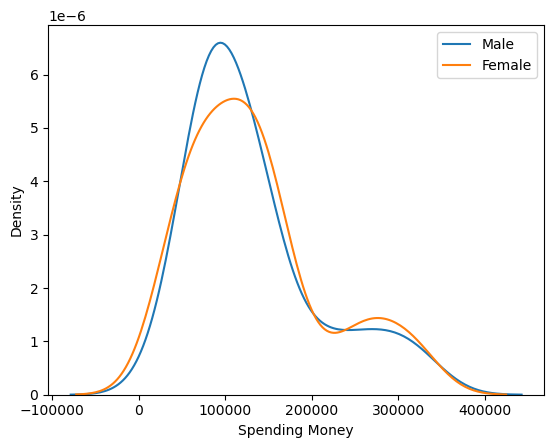

In [7]:
sns.distplot(df[df["Gender"]=="M"]["Spending Money"],hist=False,label="Male")
sns.distplot(df[df["Gender"]=="F"]["Spending Money"],hist=False,label="Female")
plt.legend()

In [8]:
df.columns

Index(['C_ID', 'Email', 'Name', 'Mobile_number', 'Gender', 'Age', 'City ',
       'State', 'Address', 'Spending Money', 'Customer Segmentation',
       'Swiping Time'],
      dtype='object')

# Customer Segmentation Based on

## 1.Spend in Dollars,

In [9]:
dg = df.groupby("Customer Segmentation").sum()["Spending Money"].reset_index()
dg_value_sorted = dg.sort_values("Spending Money",ascending = False)
dg_value_sorted

,Customer Segmentation,Spending Money
2,Old Females,1.028062e+07
3,Old Males,8.452336e+06
5,Young Males,3.138927e+06
4,Young Females,2.646789e+06
0,Mid age Females,1.079320e+06
1,Mid age Males,6.522626e+05


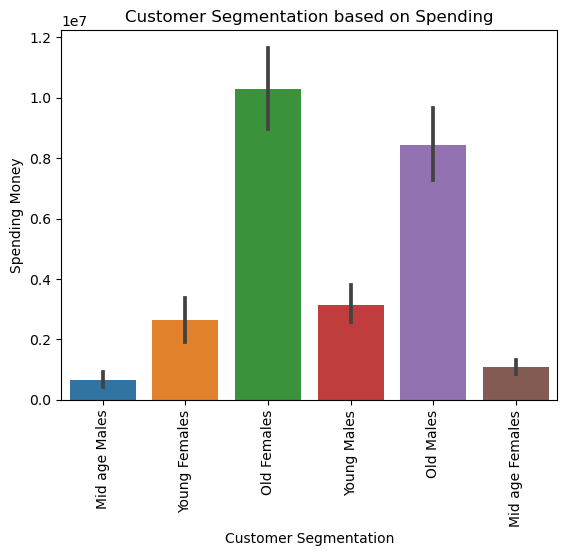

In [10]:
sns.barplot(data=df, x="Customer Segmentation", y="Spending Money",estimator='sum',)


plt.xlabel("Customer Segmentation")
plt.ylabel("Spending Money")
plt.title("Customer Segmentation based on Spending")
plt.xticks(rotation=90)



plt.show()

## 2. based on Swipes

In [11]:
df.groupby('Customer Segmentation').count()['C_ID']

Customer Segmentation
Mid age Females    11
Mid age Males       8
Old Females        70
Old Males          63
Young Females      24
Young Males        22
Name: C_ID, dtype: int64

In [12]:
df.pivot_table(index="Customer Segmentation",values="Swiping Time", aggfunc='sum')

,Swiping Time
Customer Segmentation,
Mid age Females,398
Mid age Males,272
Old Females,3863
Old Males,3176
Young Females,1021
Young Males,1264


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mid age Males'),
  Text(1, 0, 'Young Females'),
  Text(2, 0, 'Old Females'),
  Text(3, 0, 'Young Males'),
  Text(4, 0, 'Old Males'),
  Text(5, 0, 'Mid age Females')])

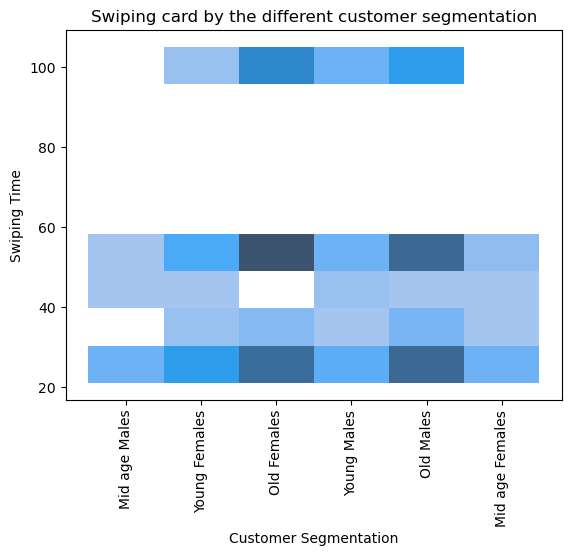

In [13]:
sns.histplot(data=df,x="Customer Segmentation",y="Swiping Time")
plt.xlabel("Customer Segmentation")
plt.ylabel("Swiping Time")
plt.title("Swiping card by the different customer segmentation")
plt.xticks(rotation=90)

## 3. Spend in terms of Product

In [14]:
df1 = pd.read_csv("Credit_Banking_2.csv")

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Credit_card                   9994 non-null   int64  
 1   Product_ID                    9994 non-null   int64  
 2   P_CATEGORY                    9994 non-null   object 
 3   CONDTION                      9994 non-null   object 
 4   Brand                         9994 non-null   object 
 5   Price                         9994 non-null   object 
 6   Selling_price                 9994 non-null   object 
 7   Coupon_ID                     9974 non-null   object 
 8   Date                          9994 non-null   object 
 9   Time                          9994 non-null   object 
 10  Merchant_name                 9994 non-null   object 
 11  M_ID                          9994 non-null   object 
 12  Payment Method                9994 non-null   object 
 13  Tra

In [16]:
prof = ProfileReport(df1)
prof.to_file(output_file="outputdf1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount
0,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08
1,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
2,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
3,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
4,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08


In [18]:
df1.groupby("P_CATEGORY").sum()["Selling Price after discount"].reset_index()

,P_CATEGORY,Selling Price after discount
0,APPLIANCES,1509851.73
1,BABY CLOTHING,1341610.17
2,BABY TOYS,1113453.06
3,BEDDING,1660588.38
4,CLOTHING,1971971.16
5,COMPUTERS,3056283.69
6,DECOR,3199400.57
7,ELECTRONICS,2683371.77
8,GAMES,1515089.31
9,KITCHEN & DINING,2016405.27


In [19]:
df1.groupby("P_CATEGORY").count()["Selling Price after discount"].reset_index()

,P_CATEGORY,Selling Price after discount
0,APPLIANCES,545
1,BABY CLOTHING,502
2,BABY TOYS,461
3,BEDDING,544
4,CLOTHING,809
5,COMPUTERS,1226
6,DECOR,1132
7,ELECTRONICS,1007
8,GAMES,693
9,KITCHEN & DINING,775


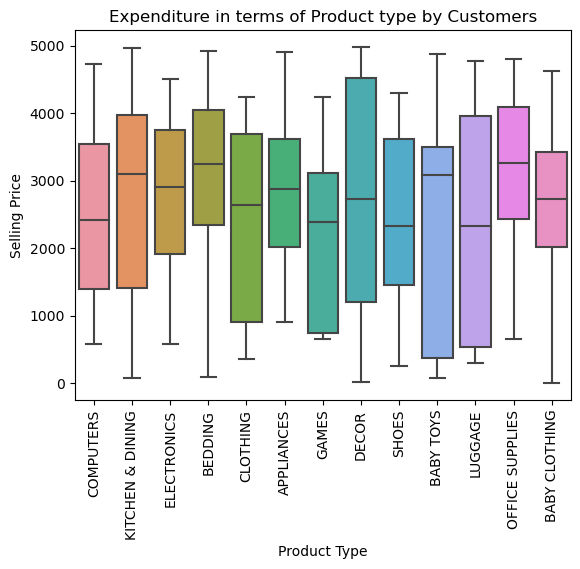

In [20]:
sns.boxplot(data=df1, x="P_CATEGORY", y="Selling Price after discount")


plt.xlabel("Product Type")
plt.ylabel("Selling Price")
plt.title("Expenditure in terms of Product type by Customers")
plt.xticks(rotation=90)

plt.show()

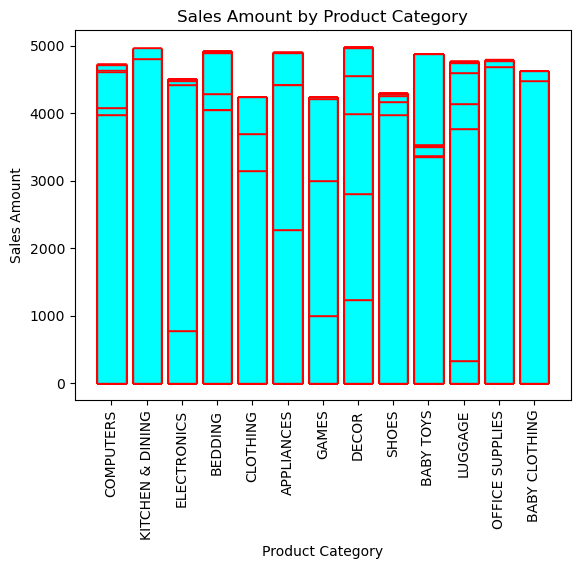

In [21]:
plt.bar(df1['P_CATEGORY'], df1['Selling Price after discount'],edgecolor='red',color='cyan')

plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.title('Sales Amount by Product Category')

plt.xticks(rotation=90)

plt.show()

## Spend in terms of  State 


In [22]:
df.pivot_table(index="State",values="Spending Money",aggfunc='sum')

,Spending Money
State,
Arizona,1.605134e+06
California,7.589398e+06
Illinois,2.006161e+06
Kentucky,2.179944e+06
Massachusetts,1.743437e+06
Missouri,7.790177e+05
Nevada,1.689787e+06
Ohio,1.026222e+06
Texas,5.509295e+06


In [23]:
df.pivot_table(index="State",values="Swiping Time",aggfunc='sum')

,Swiping Time
State,
Arizona,614
California,2984
Illinois,810
Kentucky,790
Massachusetts,691
Missouri,319
Nevada,684
Ohio,342
Texas,1984


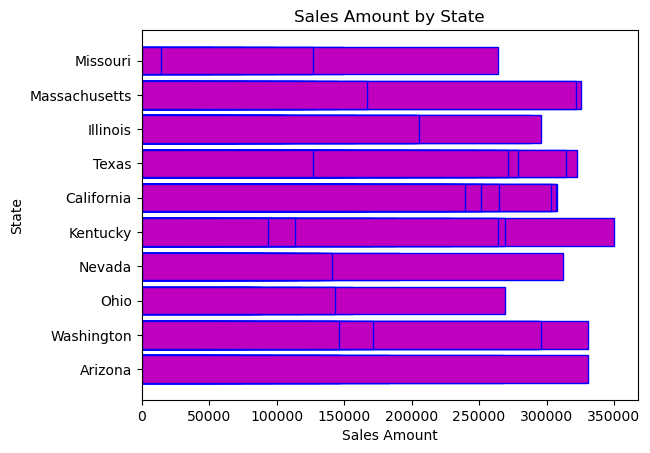

In [24]:
plt.barh(df['State'], df['Spending Money'],color = "m",edgecolor = "blue")

plt.xlabel('Sales Amount')
plt.ylabel('State')
plt.title('Sales Amount by State')

plt.show()

## Spend in terms of Payment method.


In [25]:
df1.pivot_table(index="Payment Method",values="Selling Price after discount",aggfunc='sum')

,Selling Price after discount
Payment Method,
Credit card,9517427.38
Debit card,830746.07
Deirect debits,153572.69
Gift card,182067.98
Mobile carrier Billing,10847164.00
Paypal wallet,223657.96
Prepaid card,4495616.04


In [26]:
df1.pivot_table(index="Payment Method",values="Selling Price after discount",aggfunc='count')

,Selling Price after discount
Payment Method,
Credit card,3710
Debit card,322
Deirect debits,63
Gift card,70
Mobile carrier Billing,4182
Paypal wallet,84
Prepaid card,1563


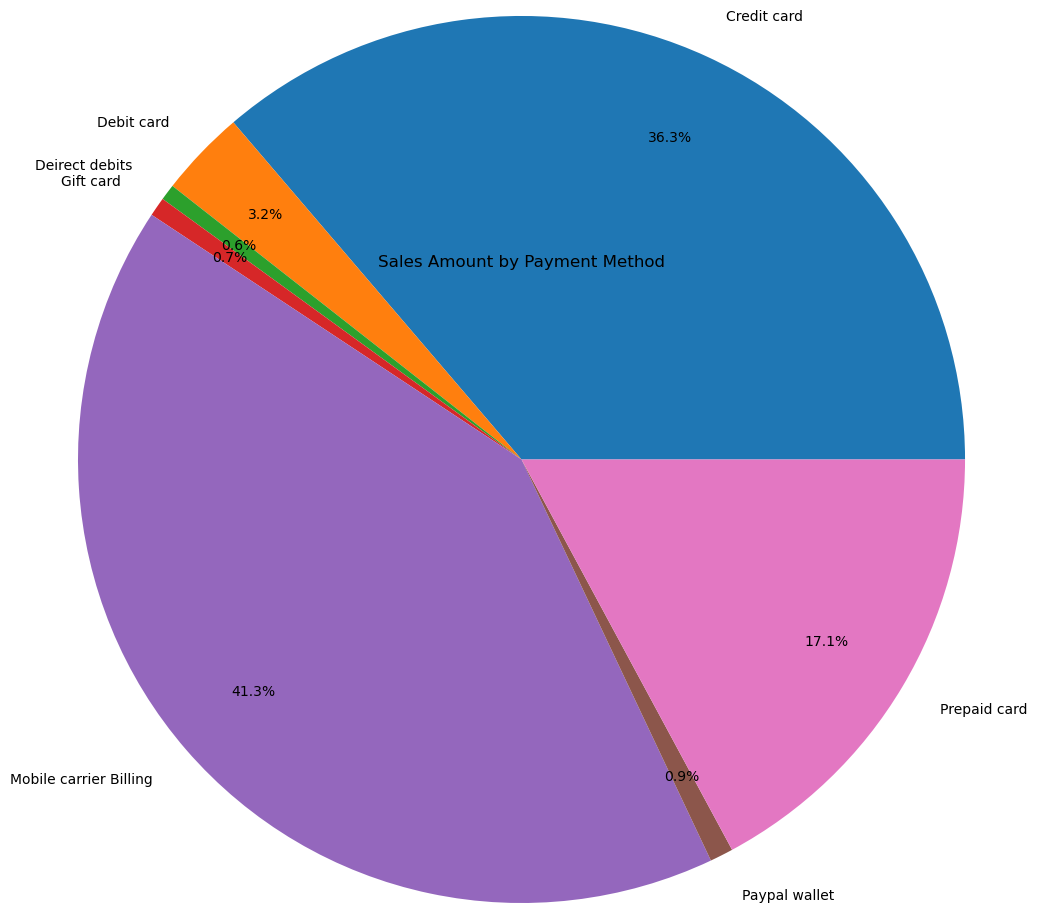

In [27]:

data = {
    'Payment Method': ['Credit card', 'Debit card', 'Deirect debits', 'Gift card', 'Mobile carrier Billing', 'Paypal wallet', 'Prepaid card'],
    'Sales Amount': [9517427.38, 830746.07, 153572.69, 182067.98, 10847164.00, 223657.96, 4495616.04]
}

df2 = pd.DataFrame(data)


plt.pie(df2['Sales Amount'], labels=df2['Payment Method'], autopct='%1.1f%%',radius = 3,pctdistance=0.8)

plt.title('Sales Amount by Payment Method')

plt.show()

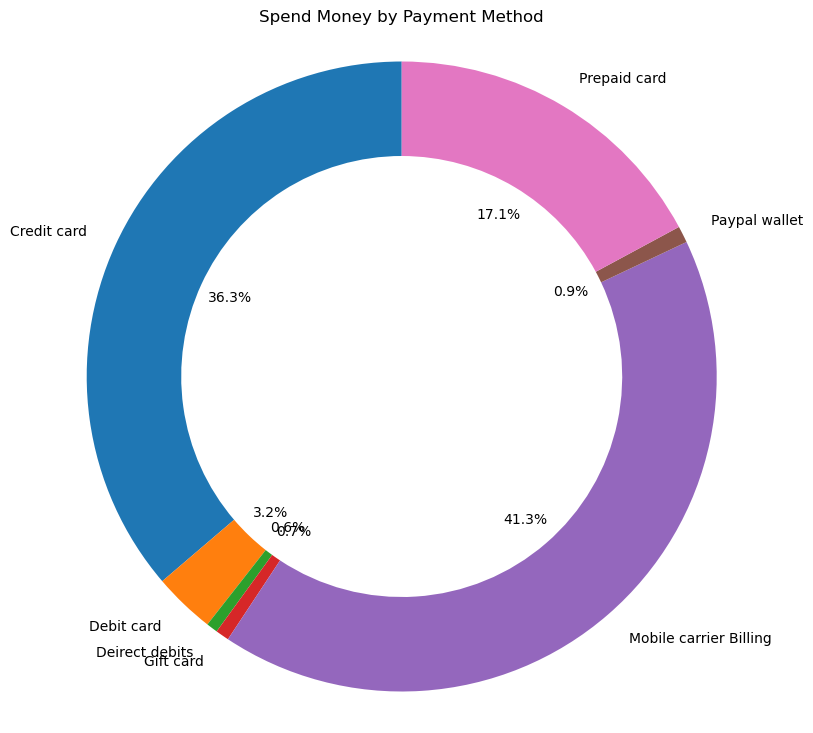

In [28]:
data = {
    'Payment Method': ['Credit card', 'Debit card', 'Deirect debits', 'Gift card', 'Mobile carrier Billing', 'Paypal wallet', 'Prepaid card'],
    'Spending Money': [9517427.38, 830746.07, 153572.69, 182067.98, 10847164.00, 223657.96, 4495616.04]
}

df2 = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10,9))

wedges, texts, autotexts = ax.pie(df2['Spending Money'], labels=df2['Payment Method'], autopct='%1.1f%%', startangle=90,
                                  wedgeprops=dict(width=0.3))

center_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(center_circle)

ax.axis('equal')

plt.title('Spend Money by Payment Method')

plt.show()


# Calculate the highest 5 spending in all above categories.


### 1.Spend in terms of Product

In [29]:
df1.groupby('P_CATEGORY').sum()["Selling Price after discount"].reset_index().sort_values('Selling Price after discount',ascending = False).head()

,P_CATEGORY,Selling Price after discount
6,DECOR,3199400.57
5,COMPUTERS,3056283.69
7,ELECTRONICS,2683371.77
11,OFFICE SUPPLIES,2465481.33
12,SHOES,2294237.72


### 2. Spend in terms of State

In [30]:
df.pivot_table(index="State",values="Spending Money",aggfunc='sum').reset_index().sort_values("Spending Money",ascending = False).head()

,State,Spending Money
1,California,7.589398e+06
8,Texas,5.509295e+06
3,Kentucky,2.179944e+06
9,Washington,2.121857e+06
2,Illinois,2.006161e+06


### 3. Spend in terms of Payment method.

In [31]:
df1.groupby("Payment Method").sum()["Selling Price after discount"].reset_index().sort_values("Selling Price after discount",ascending=False).head()

,Payment Method,Selling Price after discount
4,Mobile carrier Billing,10847164.00
0,Credit card,9517427.38
6,Prepaid card,4495616.04
1,Debit card,830746.07
5,Paypal wallet,223657.96


In [32]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount
0,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08
1,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
2,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
3,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
4,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08


In [33]:
df1.groupby("Credit_card").sum()["Return_ind"].reset_index()["Return_ind"]

0       4
1      10
2       8
3      16
4       6
       ..
193     4
194     8
195     5
196    19
197    17
Name: Return_ind, Length: 198, dtype: int64

In [34]:
df['Return_index']=df1.groupby("Credit_card").sum()["Return_ind"].reset_index()["Return_ind"]

In [35]:
df.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Spending Money,Customer Segmentation,Swiping Time,Return_index
0,1093,leo@hotmail.com,LEO,9784589578,M,41,Phoenix,Arizona,Masked,56535.780,Mid age Males,28,4
1,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked,154046.055,Young Females,49,10
2,1177,kimberly@hotmail.com,KIMBERLY,9575484585,F,84,Columbus,Ohio,Masked,156280.670,Old Females,49,8
3,1256,christina@gmail.com,CHRISTINA,8813991070,F,87,Las Vegas,Nevada,Masked,190327.900,Old Females,105,16
4,1418,miguel@gmail.com,MIGUEL,8883936622,M,35,Louisville,Kentucky,Masked,115323.460,Young Males,49,6


# Give your opinion on return category like:

### 1. Customers returning the products belongs to which state

In [36]:
dg1 = df1[['Credit_card',"P_CATEGORY" ,'Return_ind']].copy()

In [37]:
dg1 = dg1.pivot_table(index="Credit_card",columns="P_CATEGORY",values="Return_ind",aggfunc="sum")

In [38]:
dg1

P_CATEGORY,APPLIANCES,BABY CLOTHING,BABY TOYS,BEDDING,CLOTHING,COMPUTERS,DECOR,ELECTRONICS,GAMES,KITCHEN & DINING,LUGGAGE,OFFICE SUPPLIES,SHOES
Credit_card,,,,,,,,,,,,,
1093,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1174,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
1177,NaN,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0
1256,NaN,NaN,1.0,NaN,1.0,1.0,1.0,3.0,3.0,2.0,2.0,NaN,2.0
1418,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
9856,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0
9896,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [39]:
cf = df[["C_ID","State"]].set_index("C_ID")

In [40]:
cf

,State
C_ID,
1093,Arizona
1174,Washington
1177,Ohio
1256,Nevada
1418,Kentucky
...,...
9756,Texas
9856,California
9896,Missouri


In [41]:
dg1["State"]=cf["State"]

In [42]:
dg1

P_CATEGORY,APPLIANCES,BABY CLOTHING,BABY TOYS,BEDDING,CLOTHING,COMPUTERS,DECOR,ELECTRONICS,GAMES,KITCHEN & DINING,LUGGAGE,OFFICE SUPPLIES,SHOES,State
Credit_card,,,,,,,,,,,,,,
1093,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Arizona
1174,1.0,NaN,NaN,2.0,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,Washington
1177,NaN,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,Ohio
1256,NaN,NaN,1.0,NaN,1.0,1.0,1.0,3.0,3.0,2.0,2.0,NaN,2.0,Nevada
1418,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Texas
9856,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0,California
9896,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Missouri


In [43]:
dg1.groupby("State").sum()

P_CATEGORY,APPLIANCES,BABY CLOTHING,BABY TOYS,BEDDING,CLOTHING,COMPUTERS,DECOR,ELECTRONICS,GAMES,KITCHEN & DINING,LUGGAGE,OFFICE SUPPLIES,SHOES
State,,,,,,,,,,,,,
Arizona,7.0,5.0,6.0,2.0,6.0,14.0,8.0,15.0,3.0,6.0,10.0,8.0,14.0
California,26.0,21.0,21.0,21.0,36.0,56.0,49.0,42.0,38.0,37.0,24.0,38.0,41.0
Illinois,8.0,6.0,5.0,7.0,8.0,14.0,10.0,14.0,13.0,12.0,4.0,10.0,11.0
Kentucky,7.0,2.0,5.0,11.0,10.0,10.0,16.0,12.0,10.0,9.0,9.0,8.0,9.0
Massachusetts,7.0,6.0,1.0,8.0,11.0,14.0,13.0,10.0,10.0,8.0,8.0,10.0,8.0
Missouri,0.0,3.0,3.0,3.0,5.0,6.0,9.0,5.0,2.0,4.0,2.0,4.0,6.0
Nevada,5.0,6.0,1.0,7.0,8.0,12.0,16.0,10.0,7.0,7.0,8.0,8.0,6.0
Ohio,0.0,3.0,4.0,2.0,4.0,7.0,10.0,5.0,2.0,5.0,4.0,3.0,5.0
Texas,22.0,19.0,14.0,11.0,20.0,27.0,30.0,39.0,16.0,26.0,19.0,24.0,30.0


### 2. Customers returning the products belongs to which age group

In [44]:
df.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Spending Money,Customer Segmentation,Swiping Time,Return_index
0,1093,leo@hotmail.com,LEO,9784589578,M,41,Phoenix,Arizona,Masked,56535.780,Mid age Males,28,4
1,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked,154046.055,Young Females,49,10
2,1177,kimberly@hotmail.com,KIMBERLY,9575484585,F,84,Columbus,Ohio,Masked,156280.670,Old Females,49,8
3,1256,christina@gmail.com,CHRISTINA,8813991070,F,87,Las Vegas,Nevada,Masked,190327.900,Old Females,105,16
4,1418,miguel@gmail.com,MIGUEL,8883936622,M,35,Louisville,Kentucky,Masked,115323.460,Young Males,49,6


In [45]:
df.groupby("Customer Segmentation").sum()["Return_index"].sort_values(ascending=False)

Customer Segmentation
Old Females        596
Old Males          484
Young Males        188
Young Females      162
Mid age Females     62
Mid age Males       40
Name: Return_index, dtype: int64

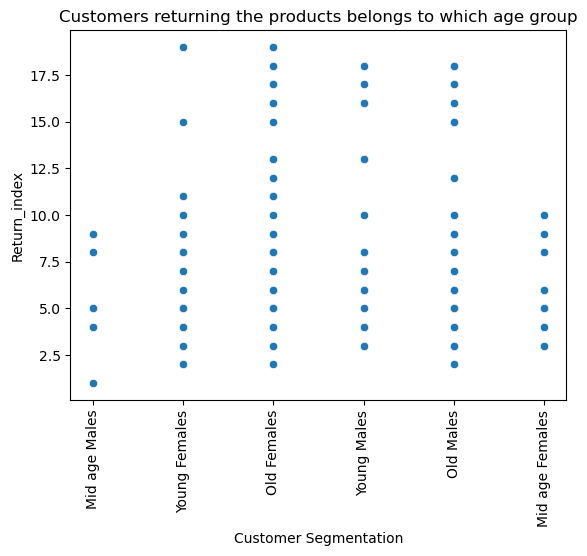

In [46]:
sns.scatterplot(data = df,x="Customer Segmentation",y="Return_index")

plt.xticks(rotation=90)
plt.title("Customers returning the products belongs to which age group")
plt.show()

### 3. customers returning the products belongs to which condition

In [47]:
df1.groupby("CONDTION").sum()["Return_ind"]

CONDTION
New            712
Refurbished    387
Used           433
Name: Return_ind, dtype: int64

<Figure size 2000x100 with 0 Axes>

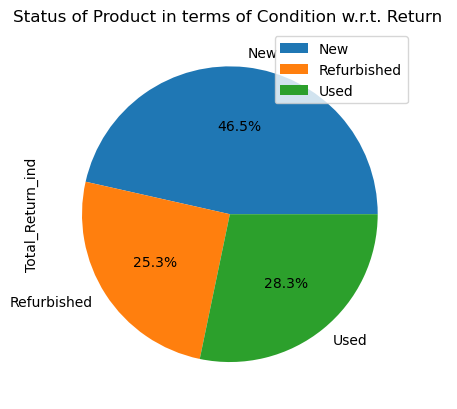

In [48]:
plt.figure(figsize=(20,1))
data = {'Condition': ['New', 'Refurbished', 'Used'],
        'Total_Return_ind': [712, 387, 433]}

dpie = pd.DataFrame(data)

dpie.plot(kind='pie', labels=dpie['Condition'], y='Total_Return_ind', autopct='%1.1f%%')

plt.title('Status of Product in terms of Condition w.r.t. Return ')
plt.show()

<Axes: xlabel='CONDTION', ylabel='Return_ind'>

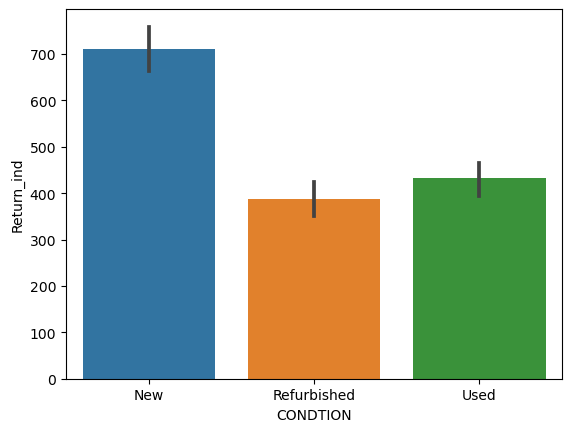

In [49]:
sns.barplot(data=df1,x="CONDTION",y="Return_ind",estimator="sum")

### 4. Customers returning the products belongs to which category of the product

In [50]:
df1.groupby("P_CATEGORY").sum()["Return_ind"].sort_values(ascending=False)

P_CATEGORY
DECOR               182
COMPUTERS           171
ELECTRONICS         159
SHOES               141
OFFICE SUPPLIES     122
KITCHEN & DINING    120
CLOTHING            119
GAMES               113
LUGGAGE              95
APPLIANCES           92
BEDDING              83
BABY CLOTHING        73
BABY TOYS            62
Name: Return_ind, dtype: int64

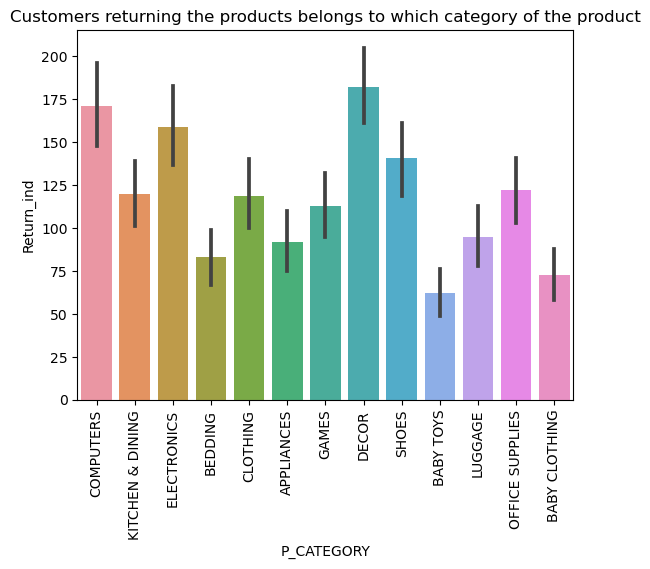

In [51]:
sns.barplot(data=df1,x="P_CATEGORY",y="Return_ind",estimator="sum")
plt.title("Customers returning the products belongs to which category of the product")
plt.xticks(rotation=90)
plt.show()

### 5. Customers returning the products belong to, which is related to the discount.

In [52]:
df1

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount
0,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08
1,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
2,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
3,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
4,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9950,381,OFFICE SUPPLIES,New,WELZA,"$4,694.60","$4,679.60",OS935,8/1/2014,21:38:00,Cole Hardware,EX7729,Mobile carrier Billing,95910,0,NaN,0.0,4679.60
9990,9950,381,OFFICE SUPPLIES,New,WELZA,"$4,694.60","$4,679.60",OS935,8/1/2014,21:38:00,Cole Hardware,EX7729,Mobile carrier Billing,95910,0,NaN,0.0,4679.60
9991,9950,381,OFFICE SUPPLIES,New,WELZA,"$4,694.60","$4,679.60",OS935,8/1/2014,21:38:00,Cole Hardware,EX7729,Mobile carrier Billing,95910,0,NaN,0.0,4679.60
9992,9950,381,OFFICE SUPPLIES,New,WELZA,"$4,694.60","$4,679.60",OS935,8/1/2014,21:38:00,Cole Hardware,EX7729,Mobile carrier Billing,95910,0,NaN,0.0,4679.60


In [53]:
df1.groupby("5% Discount").sum()["Return_ind"]

5% Discount
0.0000      1500
14.9015        0
16.7770        0
18.9140        0
18.9780        0
            ... 
232.9465       1
240.1085       1
244.6555       1
247.1720       0
249.5485       1
Name: Return_ind, Length: 73, dtype: int64

In [54]:
sx = df1[df1["5% Discount"] != 0]

In [55]:
sx.groupby("5% Discount").sum()["Return_ind"].reset_index()

,5% Discount,Return_ind
0,14.9015,0
1,16.7770,0
2,18.9140,0
3,18.9780,0
4,19.6795,0
...,...,...
67,232.9465,1
68,240.1085,1
69,244.6555,1
70,247.1720,0


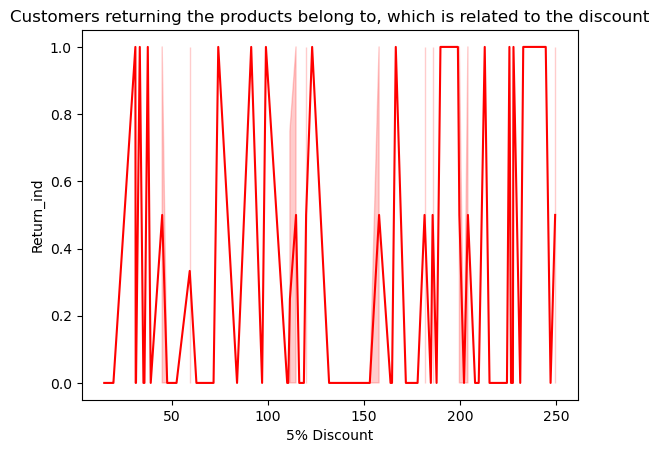

In [56]:
sns.lineplot(data=sx,x="5% Discount",y="Return_ind",color="r")
plt.title('Customers returning the products belong to, which is related to the discount')
plt.show()

# Create a profile of customers in terms of timing of their order.

In [57]:
df1['Time']

0       17:47:25
1       17:47:25
2       17:47:25
3       17:47:25
4       17:47:25
          ...   
9989    21:38:00
9990    21:38:00
9991    21:38:00
9992    21:38:00
9993    21:38:00
Name: Time, Length: 9994, dtype: object

In [58]:
from datetime import datetime
hours = [datetime.strptime(time, "%H:%M:%S").hour for time in df1["Time"]]


In [59]:
hours = pd.DataFrame({'Hour': hours})

print(hours)

      Hour
0       17
1       17
2       17
3       17
4       17
...    ...
9989    21
9990    21
9991    21
9992    21
9993    21

[9994 rows x 1 columns]


In [60]:
df1["Hours"]=hours["Hour"]

In [61]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount,Hours
0,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08,17
1,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17
2,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17
3,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17
4,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17


In [62]:
hourly_counts = df1['Hours'].value_counts()
hourly_counts.sort_values(ascending=False)

11    553
17    509
12    488
3     481
7     476
8     462
21    462
22    447
18    446
23    441
14    424
0     419
20    419
10    399
5     392
16    389
9     385
1     385
13    375
19    350
2     349
4     336
6     315
15    292
Name: Hours, dtype: int64

<Axes: >

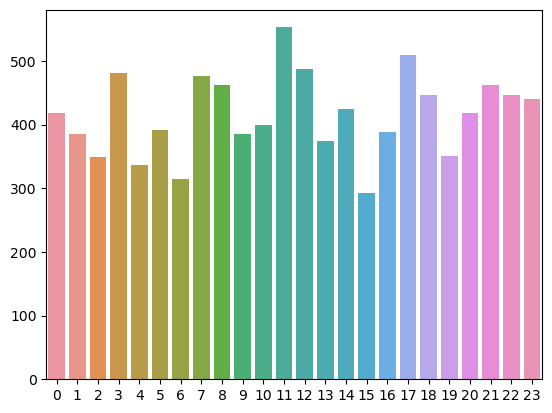

In [63]:
sns.barplot(x=hourly_counts.index, y=hourly_counts.values)

<Axes: xlabel='Hours', ylabel='Selling Price after discount'>

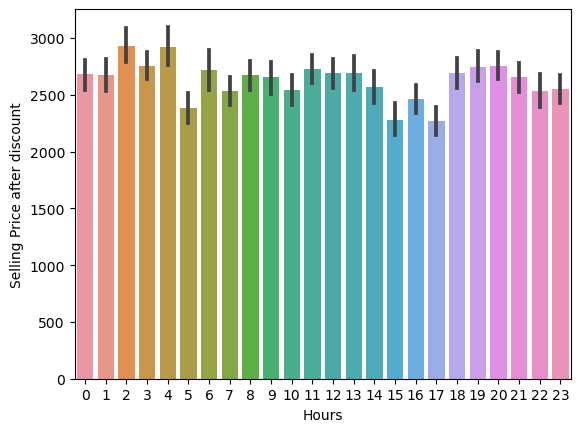

In [64]:
sns.barplot(data=df1, x="Hours", y="Selling Price after discount")

In [65]:
mx= df1.pivot_table(columns="Credit_card",index="Hours",values="Selling Price after discount",aggfunc="count")

In [66]:
mx

Credit_card,1093,1174,1177,1256,1418,1548,1692,1739,1779,1808,...,9587,9629,9699,9723,9725,9756,9856,9896,9940,9950
Hours,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.0,14.0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
2,NaN,7.0,NaN,7.0,NaN,14.0,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN,7.0
4,7.0,7.0,NaN,7.0,NaN,7.0,NaN,7.0,NaN,7.0,...,NaN,NaN,7.0,NaN,NaN,7.0,7.0,NaN,7.0,NaN
5,NaN,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,7.0,7.0,7.0,NaN,7.0,NaN,NaN,7.0,NaN
6,NaN,14.0,7.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,7.0,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN
8,NaN,7.0,NaN,7.0,NaN,NaN,7.0,NaN,7.0,NaN,...,NaN,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,14.0


In [67]:
mx.groupby("Hours").sum()

Credit_card,1093,1174,1177,1256,1418,1548,1692,1739,1779,1808,...,9587,9629,9699,9723,9725,9756,9856,9896,9940,9950
Hours,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
2,0.0,7.0,0.0,7.0,0.0,14.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,7.0
4,7.0,7.0,0.0,7.0,0.0,7.0,0.0,7.0,0.0,7.0,...,0.0,0.0,7.0,0.0,0.0,7.0,7.0,0.0,7.0,0.0
5,0.0,0.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,7.0,7.0,7.0,0.0,7.0,0.0,0.0,7.0,0.0
6,0.0,14.0,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,7.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
8,0.0,7.0,0.0,7.0,0.0,0.0,7.0,0.0,7.0,0.0,...,0.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0


<Axes: xlabel='Selling Price after discount', ylabel='Hours'>

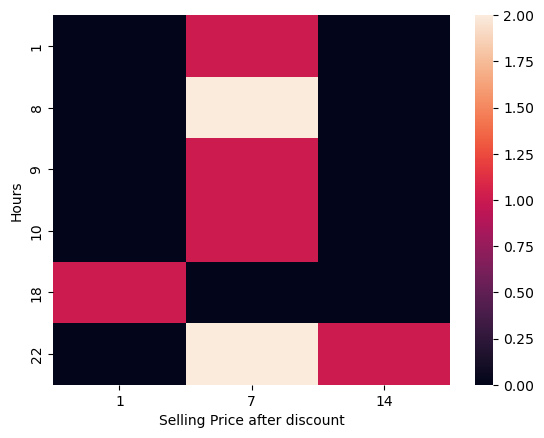

In [68]:
sns.heatmap(pd.crosstab(df1["Hours"],df1["Selling Price after discount"].value_counts()))

# 

# Which payment method is providing more discount for customers?

In [69]:
pm = df1[["Payment Method",'Price ',"Selling_price"]].copy()

In [70]:
pm.head()

,Payment Method,Price,Selling_price
0,Debit card,"$1,363.08","$1,333.08"
1,Debit card,"$1,363.08","$1,333.08"
2,Debit card,"$1,363.08","$1,333.08"
3,Debit card,"$1,363.08","$1,333.08"
4,Debit card,"$1,363.08","$1,333.08"


In [71]:
#convert string to float value
pm['Selling_price'] = pm['Selling_price'].str.replace(',', '').str.replace('(', '').str.replace(')', '').str.replace('$', '').astype(float)
pm['Price '] = pm['Price '].str.replace(',', '').str.replace('(', '').str.replace(')', '').str.replace('$', '').astype(float)

pm['Discount'] = pm['Price '] - pm["Selling_price"]

print(pm)

              Payment Method   Price   Selling_price  Discount
0                 Debit card  1363.08        1333.08      30.0
1                 Debit card  1363.08        1333.08      30.0
2                 Debit card  1363.08        1333.08      30.0
3                 Debit card  1363.08        1333.08      30.0
4                 Debit card  1363.08        1333.08      30.0
...                      ...      ...            ...       ...
9989  Mobile carrier Billing  4694.60        4679.60      15.0
9990  Mobile carrier Billing  4694.60        4679.60      15.0
9991  Mobile carrier Billing  4694.60        4679.60      15.0
9992  Mobile carrier Billing  4694.60        4679.60      15.0
9993  Mobile carrier Billing  4694.60        4679.60      15.0

[9994 rows x 4 columns]


In [72]:
df1["Payment Method"].value_counts()

Mobile carrier Billing    4182
Credit card               3710
Prepaid card              1563
Debit card                 322
Paypal wallet               84
Gift card                   70
Deirect debits              63
Name: Payment Method, dtype: int64

In [73]:
pm.groupby("Payment Method").sum()["Discount"].sort_values(ascending=False)

Payment Method
Mobile carrier Billing    122767.82
Credit card               111494.00
Prepaid card               46690.00
Debit card                  9178.00
Paypal wallet               2381.00
Deirect debits              2339.00
Gift card                   1777.00
Name: Discount, dtype: float64

# 

# Create a profile for high value items vs low value items and relate that wrt to their number of orders

In [74]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount,Hours
0,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08,17
1,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17
2,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17
3,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17
4,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17


In [75]:
df1["Selling Price after discount"].max()

4982.38

## 1. By Spending Money on Item

<Axes: xlabel='Selling Price after discount', ylabel='Count'>

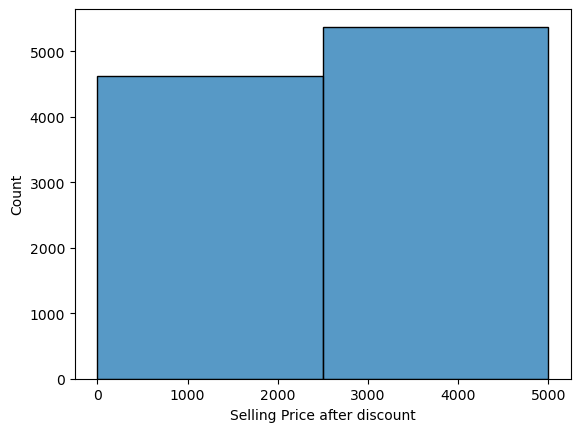

In [76]:
sns.histplot(data=df1,x="Selling Price after discount",binwidth=2500)

In [77]:
def value_category(row):
    if row['Selling Price after discount'] >= 2500:
        return 'High Value'
    else:
        return 'Low Value'

df1['Value'] = df1.apply(value_category, axis=1)

df1.sample(5)

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount,Hours,Value
6685,7481,145,CLOTHING,New,ZVYTC,"$3,631.77","$3,595.77",WA104,6/1/2014,9:04:27,Nine West,RM9837,Mobile carrier Billing,10731,1,6/8/2014,0.0,3595.77,9,High Value
7679,8067,784,APPLIANCES,Used,AVMAI,"$2,053.24","$2,037.24",HX702,10/1/2014,4:43:24,Ulta,UO9656,Mobile carrier Billing,49471,0,NaN,0.0,2037.24,4,Low Value
9012,9275,622,COMPUTERS,Refurbished,GCVNE,"$1,429.88","$1,384.88",EO898,1/4/2014,15:53:56,Staples,VN6655,Credit card,47491,0,NaN,0.0,1384.88,15,Low Value
8087,8639,138,BABY TOYS,Used,TPDLE,"$3,521.43","$3,503.43",FT411,3/23/2014,21:28:22,Gymboree,ZF8986,Mobile carrier Billing,33919,1,3/30/2014,0.0,3503.43,21,High Value
1958,2896,195,COMPUTERS,Refurbished,GCVNE,"$4,641.79","$4,615.79",OP777,1/22/2014,10:48:06,Barnes & Noble,EY1658,Credit card,92088,0,NaN,0.0,4615.79,10,High Value


In [78]:
df1.groupby("Value").count()["P_CATEGORY"]

Value
High Value    5366
Low Value     4628
Name: P_CATEGORY, dtype: int64

In [79]:
df1.groupby("Value").sum()["Selling Price after discount"]

Value
High Value    20178075.22
Low Value      6072176.90
Name: Selling Price after discount, dtype: float64

In [80]:
df1.pivot_table(index = "Value",columns="P_CATEGORY",values="Selling Price after discount")

P_CATEGORY,APPLIANCES,BABY CLOTHING,BABY TOYS,BEDDING,CLOTHING,COMPUTERS,DECOR,ELECTRONICS,GAMES,KITCHEN & DINING,LUGGAGE,OFFICE SUPPLIES,SHOES
Value,,,,,,,,,,,,,
High Value,3802.535904,3597.808116,3454.611911,3851.344060,3531.703618,3732.555964,4050.321477,3670.874568,3617.712143,3981.005969,4072.395578,3796.315736,3537.279091
Low Value,1570.272659,1385.953333,602.689107,1772.191962,1171.231440,1450.529054,1005.127319,1368.149750,1368.312585,1190.211305,766.066871,1742.284816,1505.785551


In [81]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount,Hours,Value
0,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08,17,Low Value
1,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value
2,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value
3,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value
4,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value


In [82]:
df.head()

,C_ID,Email,Name,Mobile_number,Gender,Age,City,State,Address,Spending Money,Customer Segmentation,Swiping Time,Return_index
0,1093,leo@hotmail.com,LEO,9784589578,M,41,Phoenix,Arizona,Masked,56535.780,Mid age Males,28,4
1,1174,amy@yahoomail.com,AMY,9557690013,F,31,Seattle,Washington,Masked,154046.055,Young Females,49,10
2,1177,kimberly@hotmail.com,KIMBERLY,9575484585,F,84,Columbus,Ohio,Masked,156280.670,Old Females,49,8
3,1256,christina@gmail.com,CHRISTINA,8813991070,F,87,Las Vegas,Nevada,Masked,190327.900,Old Females,105,16
4,1418,miguel@gmail.com,MIGUEL,8883936622,M,35,Louisville,Kentucky,Masked,115323.460,Young Males,49,6


<Axes: xlabel='Value', ylabel='Gender'>

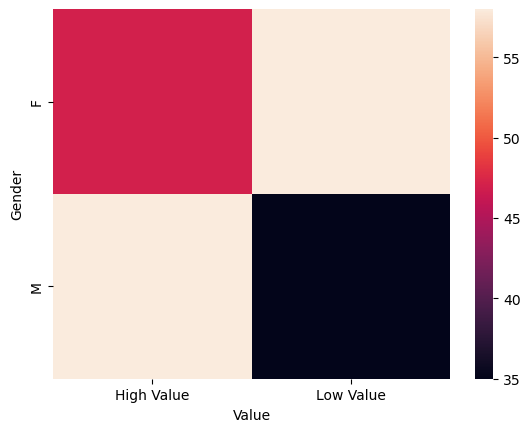

In [83]:
sns.heatmap(pd.crosstab(df["Gender"],df1["Value"]))

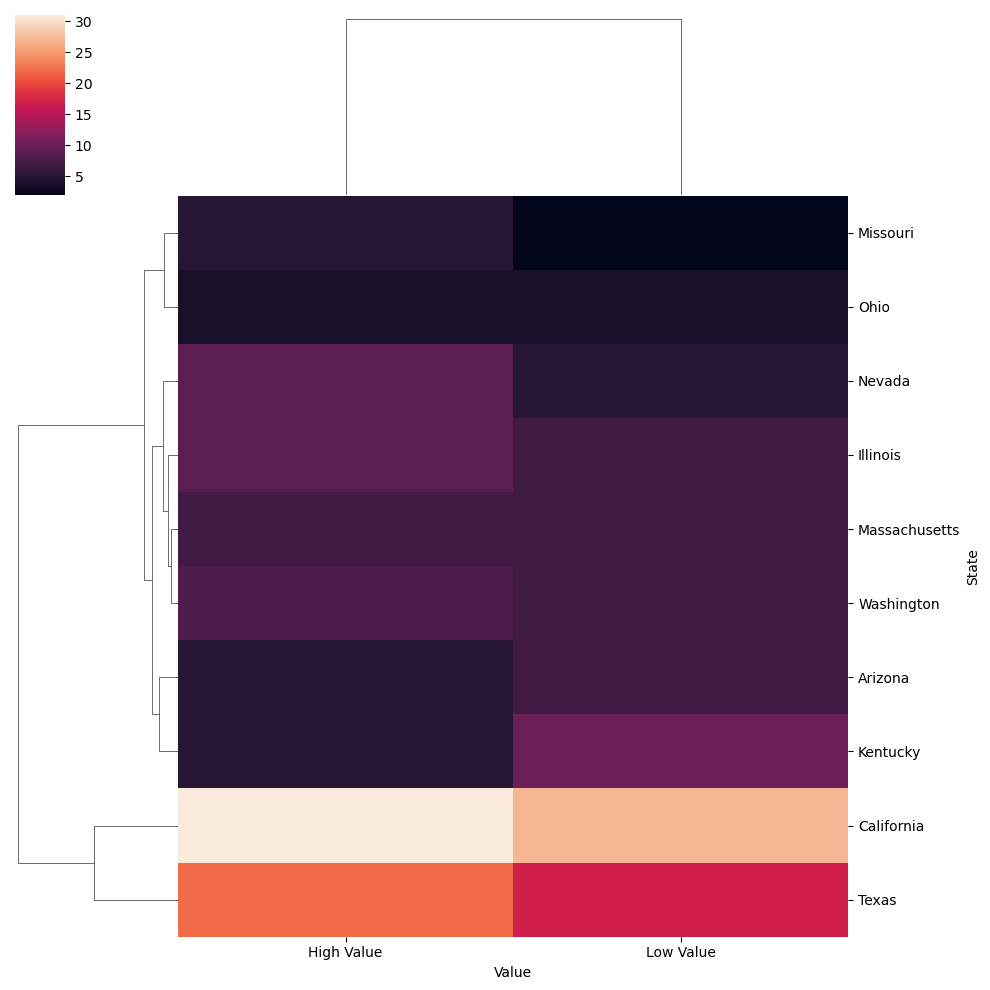

In [84]:
sns.clustermap(pd.crosstab(df["State"],df1["Value"]))

<Axes: xlabel='Value', ylabel='State'>

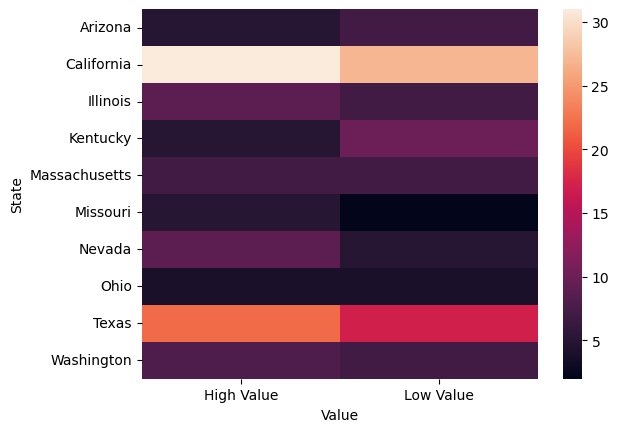

In [85]:
sns.heatmap(pd.crosstab(df["State"],df1["Value"]))

<Axes: xlabel='Value', ylabel='Merchant_name'>

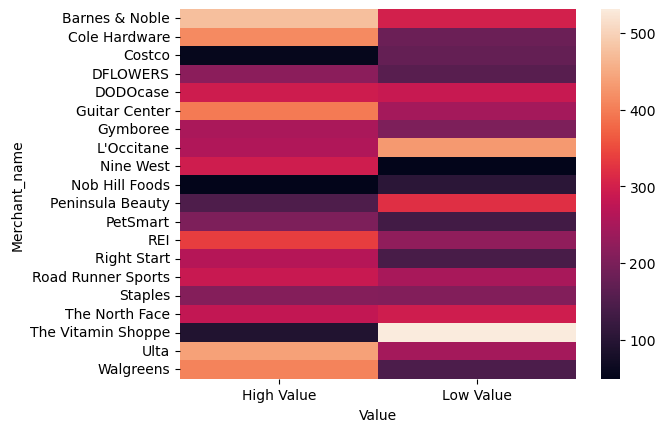

In [86]:
sns.heatmap(pd.crosstab(df1["Merchant_name"],df1["Value"]))

<Axes: xlabel='Value', ylabel='Payment Method'>

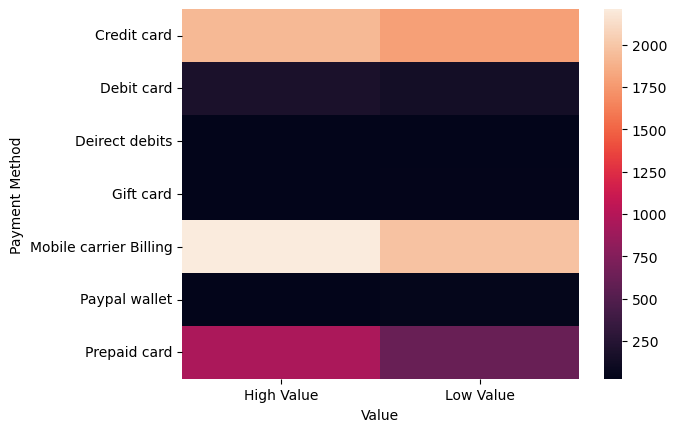

In [87]:
sns.heatmap(pd.crosstab(df1["Payment Method"],df1["Value"]))

## 2. By number of order

In [88]:
items =df1.pivot_table(index="P_CATEGORY",values="Selling Price after discount",aggfunc="count").sort_values(by="Selling Price after discount",ascending=False).reset_index()

In [89]:
items

,P_CATEGORY,Selling Price after discount
0,COMPUTERS,1226
1,DECOR,1132
2,ELECTRONICS,1007
3,SHOES,930
4,CLOTHING,809
5,OFFICE SUPPLIES,782
6,KITCHEN & DINING,775
7,GAMES,693
8,LUGGAGE,588
9,APPLIANCES,545


In [90]:
high_value_item = items.iloc[:1]
high_value_item

,P_CATEGORY,Selling Price after discount
0,COMPUTERS,1226


In [91]:
low_value_item = items.iloc[12:]
low_value_item

,P_CATEGORY,Selling Price after discount
12,BABY TOYS,461


# Do you think if merchant provides more discount then can it will lead to increase in number of orders?


In [92]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,Merchant_name,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount,Hours,Value
0,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08,17,Low Value
1,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value
2,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value
3,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value
4,1093,151,COMPUTERS,New,DCJRW,"$1,363.08","$1,333.08",NM501,3/12/2014,17:47:25,Barnes & Noble,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value


In [93]:
df1.groupby('Merchant_name').sum()['Selling Price after discount'].sort_values(ascending=False)

Merchant_name
Ulta                  2112288.07
Barnes & Noble        2036319.81
Walgreens             1958578.81
Cole Hardware         1928548.46
Guitar Center         1709400.43
DODOcase              1542406.07
REI                   1529913.65
The North Face        1529632.91
L'Occitane            1259902.35
Right Start           1245874.43
Road Runner Sports    1237491.62
The Vitamin Shoppe    1194498.70
Nine West             1164517.97
Gymboree              1145267.19
Peninsula Beauty      1065655.35
PetSmart               923347.73
Staples                911741.09
DFLOWERS               889424.26
Nob Hill Foods         445296.81
Costco                 420146.41
Name: Selling Price after discount, dtype: float64

In [94]:
df1['Price '] = df1['Price '].str.replace(',', '').str.replace('(', '').str.replace(')', '').str.replace('$', '').astype(float)

df1['Discount'] = df1['Price '] - df1["Selling Price after discount"]

print(df1)

      Credit_card  Product_ID       P_CATEGORY CONDTION  Brand   Price   \
0            1093         151        COMPUTERS      New  DCJRW  1363.08   
1            1093         151        COMPUTERS      New  DCJRW  1363.08   
2            1093         151        COMPUTERS      New  DCJRW  1363.08   
3            1093         151        COMPUTERS      New  DCJRW  1363.08   
4            1093         151        COMPUTERS      New  DCJRW  1363.08   
...           ...         ...              ...      ...    ...      ...   
9989         9950         381  OFFICE SUPPLIES      New  WELZA  4694.60   
9990         9950         381  OFFICE SUPPLIES      New  WELZA  4694.60   
9991         9950         381  OFFICE SUPPLIES      New  WELZA  4694.60   
9992         9950         381  OFFICE SUPPLIES      New  WELZA  4694.60   
9993         9950         381  OFFICE SUPPLIES      New  WELZA  4694.60   

     Selling_price Coupon_ID       Date      Time  ...    M_ID  \
0       $1,333.08      NM501  3/1

In [95]:
df1.head()

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,...,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount,Hours,Value,Discount
0,1093,151,COMPUTERS,New,DCJRW,1363.08,"$1,333.08",NM501,3/12/2014,17:47:25,...,EY1660,Debit card,18187,1,3/19/2014,0.0,1333.08,17,Low Value,30.0
1,1093,151,COMPUTERS,New,DCJRW,1363.08,"$1,333.08",NM501,3/12/2014,17:47:25,...,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value,30.0
2,1093,151,COMPUTERS,New,DCJRW,1363.08,"$1,333.08",NM501,3/12/2014,17:47:25,...,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value,30.0
3,1093,151,COMPUTERS,New,DCJRW,1363.08,"$1,333.08",NM501,3/12/2014,17:47:25,...,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value,30.0
4,1093,151,COMPUTERS,New,DCJRW,1363.08,"$1,333.08",NM501,3/12/2014,17:47:25,...,EY1660,Debit card,18187,0,NaN,0.0,1333.08,17,Low Value,30.0


In [96]:
discount = df1.groupby('Merchant_name').sum()['Discount'].reset_index()

In [97]:
discount

,Merchant_name,Discount
0,Barnes & Noble,23886.29
1,Cole Hardware,17614.43
2,Costco,6961.18
3,DFLOWERS,12344.41
4,DODOcase,19275.78
5,Guitar Center,19266.31
6,Gymboree,14570.61
7,L'Occitane,21636.33
8,Nine West,9442.09
9,Nob Hill Foods,4326.00


In [98]:
count_of_order = df1.groupby('Merchant_name').count()['Credit_card'].reset_index()

In [99]:
count_of_order

,Merchant_name,Credit_card
0,Barnes & Noble,776
1,Cole Hardware,594
2,Costco,231
3,DFLOWERS,377
4,DODOcase,578
5,Guitar Center,642
6,Gymboree,454
7,L'Occitane,689
8,Nine West,343
9,Nob Hill Foods,154


In [100]:
rs = pd.merge(discount,count_of_order,how = 'outer')

In [101]:
rs.rename(columns={'Credit_card': 'No_of_orders'}, inplace=True)

In [102]:
rs

,Merchant_name,Discount,No_of_orders
0,Barnes & Noble,23886.29,776
1,Cole Hardware,17614.43,594
2,Costco,6961.18,231
3,DFLOWERS,12344.41,377
4,DODOcase,19275.78,578
5,Guitar Center,19266.31,642
6,Gymboree,14570.61,454
7,L'Occitane,21636.33,689
8,Nine West,9442.09,343
9,Nob Hill Foods,4326.00,154


In [103]:
rs['per_discount'] = rs['Discount']/rs['No_of_orders']

In [104]:
rs

,Merchant_name,Discount,No_of_orders,per_discount
0,Barnes & Noble,23886.29,776,30.781302
1,Cole Hardware,17614.43,594,29.653923
2,Costco,6961.18,231,30.134978
3,DFLOWERS,12344.41,377,32.743793
4,DODOcase,19275.78,578,33.349100
5,Guitar Center,19266.31,642,30.009829
6,Gymboree,14570.61,454,32.093855
7,L'Occitane,21636.33,689,31.402511
8,Nine West,9442.09,343,27.527959
9,Nob Hill Foods,4326.00,154,28.090909


In [105]:
np.mean(1/rs['per_discount'])

0.032479617388725665

In [106]:
rs['Discount'] = rs['Discount']*np.mean(1/rs['per_discount'])

In [107]:
rs

,Merchant_name,Discount,No_of_orders,per_discount
0,Barnes & Noble,775.817560,776,30.781302
1,Cole Hardware,572.109947,594,29.653923
2,Costco,226.096463,231,30.134978
3,DFLOWERS,400.941714,377,32.743793
4,DODOcase,626.069959,578,33.349100
5,Guitar Center,625.762377,642,30.009829
6,Gymboree,473.247838,454,32.093855
7,L'Occitane,702.739720,689,31.402511
8,Nine West,306.675471,343,27.527959
9,Nob Hill Foods,140.506825,154,28.090909


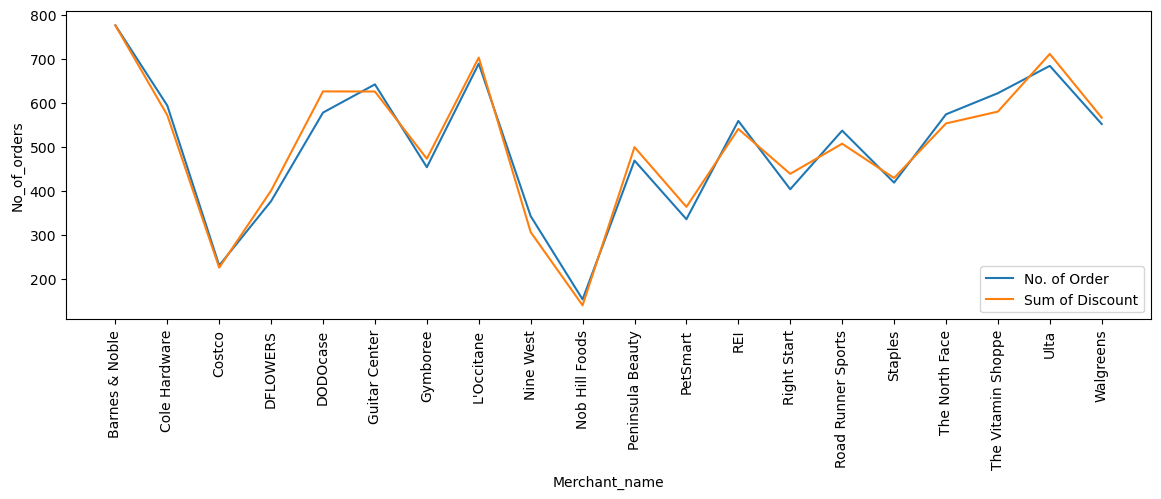

In [108]:
plt.figure(figsize=(14, 4))
sns.lineplot(data=rs, x='Merchant_name', y='No_of_orders', label='No. of Order')
sns.lineplot(data=rs, x='Merchant_name', y='Discount', label='Sum of Discount')
plt.legend()
plt.xticks(rotation=90)
plt.show()
sns.set_style('darkgrid')

In [109]:
df1['Discount'] = df1['Discount'].replace(0, np.nan)

In [110]:
ks = df1.groupby("Merchant_name").count()['Credit_card'].sort_values(ascending=False).reset_index()

In [111]:
ks.rename(columns={'Credit_card':"No_of_orders"},inplace = True)

In [112]:
ks

,Merchant_name,No_of_orders
0,Barnes & Noble,776
1,L'Occitane,689
2,Ulta,684
3,Guitar Center,642
4,The Vitamin Shoppe,622
5,Cole Hardware,594
6,DODOcase,578
7,The North Face,574
8,REI,559
9,Walgreens,552


In [113]:
bs =df1.groupby('Merchant_name').count()['Discount'].sort_values(ascending=False).reset_index()

In [114]:
# NDP = Number of Discount Product
bs.rename(columns={'Discount':"NDP"},inplace = True)

In [115]:
bs

,Merchant_name,NDP
0,Barnes & Noble,774
1,L'Occitane,686
2,Ulta,684
3,Guitar Center,639
4,The Vitamin Shoppe,622
5,Cole Hardware,593
6,DODOcase,577
7,The North Face,571
8,REI,559
9,Walgreens,550


In [116]:
es = pd.merge(ks,bs,how="outer")
es['%_of_discount'] = (es['NDP']/es['No_of_orders'])*100

In [117]:
es

,Merchant_name,No_of_orders,NDP,%_of_discount
0,Barnes & Noble,776,774,99.742268
1,L'Occitane,689,686,99.564586
2,Ulta,684,684,100.000000
3,Guitar Center,642,639,99.532710
4,The Vitamin Shoppe,622,622,100.000000
5,Cole Hardware,594,593,99.831650
6,DODOcase,578,577,99.826990
7,The North Face,574,571,99.477352
8,REI,559,559,100.000000
9,Walgreens,552,550,99.637681


In [118]:
df1[df1['Discount'] == 0]

,Credit_card,Product_ID,P_CATEGORY,CONDTION,Brand,Price,Selling_price,Coupon_ID,Date,Time,...,M_ID,Payment Method,Transaction ID,Return_ind,Return_date,5% Discount,Selling Price after discount,Hours,Value,Discount


**In this project, for the data cleaning and analysis tasks, I completed and performed the following steps:**

**Customer Segmentation:**
 Created segments based on the gender and age of customers. 
 
**Spend Calculation:** 
 Calculated spend in dollars based on Product, State, and Payment Method. 
 
**Highest Spending:** 
 Identified the top 5 spending customers in each category (Product, State, and Payment Method).
 
**Return Category Analysis:** 
  Analysed the return patterns of customers based on state, age group, product category, and discount. 
  
**Customer Order Timing Profile:** 
  Created a profile of customers based on the timing of their orders, such as the most common order times.
  
**Payment Method and Discounts:** 
  Determine which payment method provides more discounts for customers. 
  
**High-Value vs. Low-Value Items:**
  Create a profile of customers who purchase high-value items and compare them with customers who purchase low-value items.
  
**Analyse the number of orders made by each group:** 
  Impact of Discounts on Order Numbers: Analysed whether providing more discounts leads to an increase in the number of       orders.

# 

# 

# .......................................................Thank You......................................................